# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [142]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [143]:
#Set up parameter list for openweathermapy call and data fields to access from response 

params = {"units": "imperial", "appid": api_key}
data_fields = ["name", "sys.country","clouds.all", "dt", "main.humidity", "coord.lat", "coord.lon",
              "main.temp_max","wind.speed"]


#Set up dataframe to accumulate weather data
column_names = ["City", "Country", "Cloudiness", "Date", "Humidity",
                                    "Lat", "Lng", "Max Temp", "Wind Speed"]

weather_df = pd.DataFrame(columns = column_names)

#Loop through city list adding weather data for each city to 
# dataframe, ignoring 404 respones (city not found by openweathermapy)

counter = 0

print("Begin weather data collection")

for city in cities:
    try:
        current_weather = owm.get_current(city, **params)
        print(f"Processing record {counter}: {city}")
        weather_df.loc[counter] = current_weather(*data_fields)
        counter += 1    
    except:
        print(f"Skipping - City weather not found: {city}")
    

Begin weather data collection
Processing record 0: longyearbyen
Processing record 1: turukhansk
Processing record 2: gat
Processing record 3: albany
Processing record 4: hobart
Skipping - City weather not found: sembe
Skipping - City weather not found: samusu
Processing record 5: provideniya
Processing record 6: ewa beach
Processing record 7: saint-philippe
Processing record 8: kirksville
Processing record 9: bluff
Processing record 10: punta arenas
Processing record 11: ahipara
Processing record 12: ushuaia
Processing record 13: rikitea
Processing record 14: puerto ayora
Processing record 15: cape town
Processing record 16: butaritari
Processing record 17: kapaa
Processing record 18: margate
Skipping - City weather not found: bengkulu
Processing record 19: saint-pierre
Processing record 20: magadan
Skipping - City weather not found: wulanhaote
Processing record 21: thompson
Processing record 22: paka
Processing record 23: castro
Processing record 24: susanville
Processing record 25: r

Processing record 217: dawson creek
Processing record 218: codrington
Processing record 219: shamary
Processing record 220: victoria
Processing record 221: hualmay
Processing record 222: klaksvik
Processing record 223: nsanje
Processing record 224: leningradskiy
Processing record 225: luderitz
Processing record 226: galle
Skipping - City weather not found: attawapiskat
Processing record 227: mar del plata
Processing record 228: walvis bay
Processing record 229: bay roberts
Processing record 230: la crosse
Processing record 231: biloli
Processing record 232: kiama
Processing record 233: sisimiut
Processing record 234: katherine
Processing record 235: yatou
Processing record 236: haines junction
Processing record 237: hamilton
Processing record 238: skjervoy
Processing record 239: brigantine
Processing record 240: itoman
Processing record 241: balsta
Processing record 242: asyut
Processing record 243: katsuura
Processing record 244: ayan
Processing record 245: nchelenge
Processing record

Skipping - City weather not found: saint-honore
Skipping - City weather not found: katsiveli
Processing record 439: sorong
Processing record 440: mana
Processing record 441: moussoro
Processing record 442: merritt island
Processing record 443: shenjiamen
Processing record 444: jaypur
Processing record 445: fortuna
Processing record 446: santo antonio do ica
Processing record 447: sorland
Processing record 448: mithi
Processing record 449: cidreira
Processing record 450: abnub
Processing record 451: sao felix do xingu
Processing record 452: jining
Skipping - City weather not found: azimur
Processing record 453: golfito
Processing record 454: tyler
Processing record 455: camacha
Processing record 456: kahului
Processing record 457: kouroussa
Processing record 458: la asuncion
Processing record 459: damietta
Processing record 460: boende
Processing record 461: mandalgovi
Processing record 462: la rioja
Processing record 463: alihe
Processing record 464: harlingen
Processing record 465: vi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [175]:
weather_df.to_csv(output_data_file)
weather_df.count()

City          533
Country       533
Cloudiness    533
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64

In [152]:
weather_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Longyearbyen,NO,40,1551459000,64,78.22,15.63,1.4,0.94
1,Turukhansk,RU,80,1551462499,82,65.80,87.96,12.8,15.70
2,Gat,SN,0,1551461400,6,14.69,-16.54,87.8,17.22
3,Albany,US,20,1551462325,63,42.65,-73.75,36.0,3.36
4,Hobart,AU,0,1551461837,46,-42.88,147.33,73.4,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [164]:
datetime.fromtimestamp(1551310309)
datetime.now().strftime("%m/%d/%y")


'03/01/19'

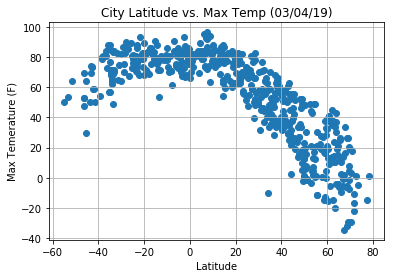

In [176]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.title("City Latitude vs. Max Temp (" + datetime.now().strftime("%m/%d/%y") + ")")
plt.savefig("output_data/Lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

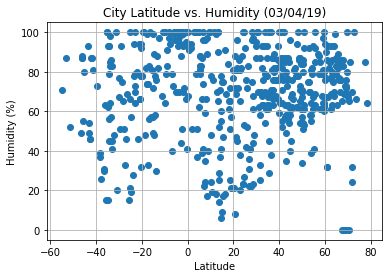

In [177]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (" + datetime.now().strftime("%m/%d/%y") + ")")
plt.savefig("output_data/Lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

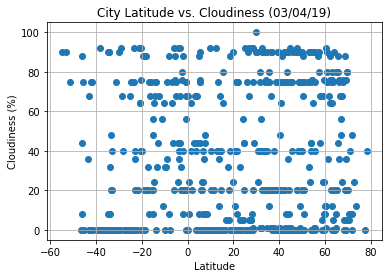

In [178]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (" + datetime.now().strftime("%m/%d/%y") + ")")
plt.savefig("output_data/Lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

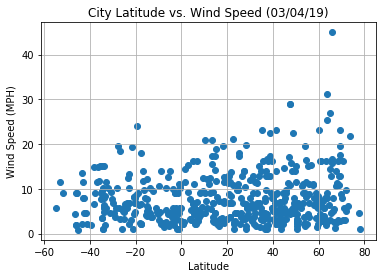

In [179]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("City Latitude vs. Wind Speed (" + datetime.now().strftime("%m/%d/%y") + ")")
plt.savefig("output_data/Lat_vs_wind.png")
plt.show()